### Degree distribution plots

In [1]:
import pandas as pd
from IPython.display import display, HTML
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

path1 = './../../../../media/miglesia/Elements/export_france/data/type1/DP1610_MAASTRICHT1_1997_2013'

display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
len(range(1997, 2014, 2))

9

IOError: File ./data/processed/degree_dist/ID_deg_1997_1.csv does not exist

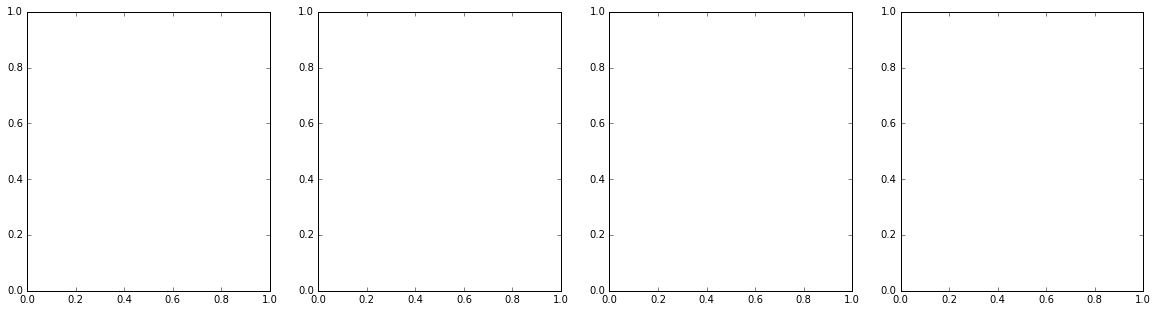

In [3]:
# bins  = np.arange(-0.25, 4.5, 0.02)
bins = range(1500)

fig, axs = plt.subplots(1, 4, figsize = (20, 5))

for i in range(3):
    window = [1, 3, 5][i]
    for y in range(4):
        year = range(1997, 2014, 4)[y]

        df = pd.read_csv('./data/processed/degree_dist/ID_deg_'+str(year)+'_'+str(window)+'.csv')
        grouped = df.groupby(pd.cut(df.ID_degree, bins), observed = True)
        log_deg_dist = np.log10(grouped.agg({'ID_degree': ['mean', 'count']})).dropna()
        ax = axs[y]
        log_deg_dist.plot(marker = 'o', x = ('ID_degree', 'mean'), y = ('ID_degree', 'count'), 
                          alpha = .3, mec = 'None', ax = ax)
        ax.legend_.remove()
        

In [ ]:
bins  = np.arange(-0.25, 5, 0.02)
hist = plt.hist(np.log10(df.ID_degree), bins, cumulative = True, normed = True)

# bins = np.append(range(1500), range(1500, 74000, 10))
# hist = plt.hist(df.ID_degree, bins, cumulative = True, normed = True, alpha = 0)

CDF = hist[0]; bins_ = hist[1]

x = np.log10(1 - CDF)
y = (bins_[1:] + bins_[:-1])/2.
plt.plot(x, y, marker = 'o')

In [ ]:
# bins  = np.arange(-0.25, 4.5, 0.02)
bins  = np.arange(-0.25, 5, 0.02)

fig, axs = plt.subplots(1, 4, figsize = (20, 5))

for i in range(3):
    window = [1, 3, 5][i]
    for yr in range(4):
        year = range(1999, 2012, 4)[yr]

        df = pd.read_csv('./data/processed/degree_dist/ID_deg_'+str(year)+'_'+str(window)+'.csv')
        
        hist = plt.hist(np.log10(df.ID_degree), bins, cumulative = True, normed = True, alpha = 0);

        # bins = np.append(range(1500), range(1500, 74000, 10))
        # hist = plt.hist(df.ID_degree, bins, cumulative = True, normed = True, alpha = 0)

        CDF = hist[0]; bins_ = hist[1]
        x = np.log10(1 - CDF); y = (bins_[1:] + bins_[:-1])/2.
        ax = axs[yr]
        ax.plot(x, y, marker = 'o', alpha = .3, mec = 'None')
#         log_deg_dist.plot(marker = 'o', x = ('ID_degree', 'mean'), y = ('ID_degree', 'count'), 
#                           alpha = .3, mec = 'None', ax = ax)
#         ax.legend_.remove()
        ax.set_xlim(-5, 0); ax.set_ylim(-.5, 4.5)
        ax.set_title(str(year))
        